# Analysis of canonizing MPS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tebd.tebd import run_tebd

In [2]:
model_name = 'ising'

## Effect of $\lambda$

In [9]:
N = 6

In [15]:
lmda = 2

In [16]:
observables = ['energy']

In [17]:
with tqdm(total=1) as pbar:
    model_params = {"lmda": 1}
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, observables=observables, print_to_stdout=False, canonize=True
    )
    energies_canonize = observables_at_midsteps["energy"]
    pbar.update(1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.19s/it]


In [18]:
with tqdm(total=1) as pbar:
    model_params = {"lmda": 1}
    observables_at_midsteps = run_tebd(
        model_name, model_params, N, observables=observables, print_to_stdout=False, canonize=False
    )
    energies_no_canonize = observables_at_midsteps["energy"]
    pbar.update(1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.51s/it]


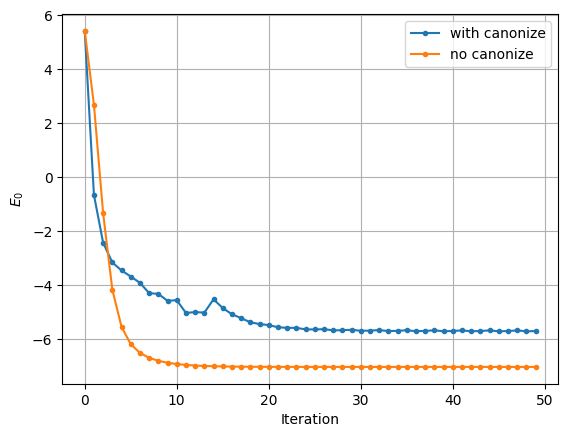

In [19]:
plt.plot(energies_canonize, 'o-', markersize=3, label=f"with canonize")
plt.plot(energies_no_canonize, 'o-', markersize=3, label=f"no canonize")
plt.xlabel("Iteration")
plt.ylabel("$E_0$")
plt.legend()
plt.grid();